In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
# mouse_metadata_path = "data/Mouse_metadata.csv"
# study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Combine the data into a single dataset

# Display the data table for preview

combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Create a copy first to not mess up the combined_df
cleaned_df = combined_df.copy()

# Drop duplicates by Mouse ID and Timepoint
cleaned_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first', inplace=True)

# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

# # Export cleaned_df
# cleaned_df.to_csv("data/cleaned_df.csv", index=False, header=True)

249

In [5]:
# Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_df = cleaned_df.groupby("Drug Regimen")

tumor_avg = drug_regimen_df["Tumor Volume (mm3)"].mean().map('{:.2f}'.format)
tumor_med = drug_regimen_df["Tumor Volume (mm3)"].median().map('{:.2f}'.format)
tumor_var = drug_regimen_df["Tumor Volume (mm3)"].var().map('{:.2f}'.format)
tumor_std = drug_regimen_df["Tumor Volume (mm3)"].std().map('{:.2f}'.format)
tumor_sem = drug_regimen_df["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)

summary_stats = pd.DataFrame({
                            "Mean" : tumor_avg,
                            "Median" : tumor_med,
                            "Variance" : tumor_var,
                            "Standard Deviation" : tumor_std,
                            "SEM" : tumor_sem
                            })

summary_stats

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# agg_summary = summary_stats["Mean"].aggregate(func=None)
# TypeError: 'NoneType' object is not callable

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


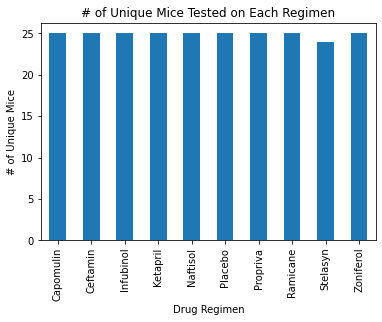

<Figure size 432x288 with 0 Axes>

In [7]:
# Bar and Pie Charts
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_regimen_df["Mouse ID"].nunique().plot(kind="bar")
plt.title("# of Unique Mice Tested on Each Regimen")
plt.ylabel("# of Unique Mice")
plt.show()
plt.tight_layout()


In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.


In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
